# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

config = {
    'model': 'llama3'  # 'mistral' # "starcoder2"
}
vn = MyVanna(config=config)


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which database do you want to query?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../postgres-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Postgres</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Microsoft SQL Server</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../duckdb-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">DuckDB</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../snowflake-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Snowflake</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../bigquery-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">BigQuery</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> SQLite</div>
        <small class="w-full"></small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../other-database-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other Database</div>
        <small class="w-full">Use Vanna to generate queries for any SQL database</small>
      </div>
    </a>
  </li>
    
</ul>
    

In [3]:
import os.path
import re
from time import time

In [4]:
def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

In [5]:

# file_db = "./db/gpt3sql.sqlite"

file_db = "~/Downloads/chinook.sqlite"
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [6]:
vn.run_sql_is_set

True

In [7]:
def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

In [8]:
if True:  # False:
    remove_collections()

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [9]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type


In [10]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [11]:
df_ddl

,type,sql
0,table,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...
1,table,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...
2,table,CREATE TABLE [Customer]\n(\n [CustomerId] I...
3,table,CREATE TABLE [Employee]\n(\n [EmployeeId] I...
4,table,CREATE TABLE [Genre]\n(\n [GenreId] INTEGER...
5,table,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...
6,table,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...
7,table,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...
8,table,CREATE TABLE [Playlist]\n(\n [PlaylistId] I...
9,table,CREATE TABLE [PlaylistTrack]\n(\n [Playlist...


In [12]:
for ddl in df_ddl['sql'].to_list():
    ddl = strip_brackets(ddl)
    vn.train(ddl=ddl)

Adding ddl: CREATE TABLE Album
(
    AlbumId INTEGER  NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    CONSTRAINT PK_Album PRIMARY KEY  (AlbumId),
    FOREIGN KEY (ArtistId) REFERENCES Artist (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE Artist
(
    ArtistId INTEGER  NOT NULL,
    Name NVARCHAR(120),
    CONSTRAINT PK_Artist PRIMARY KEY  (ArtistId)
)
Adding ddl: CREATE TABLE Customer
(
    CustomerId INTEGER  NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),
    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl:

In [13]:
new_table_name = "t_person"

In [14]:
# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships

vn.train(ddl=f"""
    CREATE TABLE IF NOT EXISTS {new_table_name} (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        email text,
        age INT
    )
""")

Adding ddl: 
    CREATE TABLE IF NOT EXISTS t_person (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        email text,
        age INT
    )



'a4e8be30-d5dd-5a8a-aa99-64c74783e17d-ddl'

In [15]:
# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

Adding documentation....


'51cf1d6d-7637-5b87-b9e7-31c577fbde59-doc'

In [16]:
# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
vn.train(sql=f"SELECT * FROM {new_table_name} WHERE name = 'John Doe'")

Ollama parameters:
model=llama3:latest,
options={},
keep_alive=None
Prompt Content:
[{"role": "system", "content": "The user will give you SQL and you will try to guess what the business question this query is answering. Return just the question without any additional explanation. Do not reference the table name in the question."}, {"role": "user", "content": "SELECT * FROM t_person WHERE name = 'John Doe'"}]
Ollama Response:
{'model': 'llama3:latest', 'created_at': '2024-06-08T23:06:12.058875071Z', 'message': {'role': 'assistant', 'content': 'What person has a name of "John Doe"?'}, 'done_reason': 'stop', 'done': True, 'total_duration': 7534029358, 'load_duration': 1556074554, 'prompt_eval_count': 72, 'prompt_eval_duration': 4276279000, 'eval_count': 11, 'eval_duration': 1641629000}
Question generated with sql: What person has a name of "John Doe"? 
Adding SQL...


'e676785b-a05d-541a-bcf4-52eda4106c03-sql'

In [17]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,e676785b-a05d-541a-bcf4-52eda4106c03-sql,"What person has a name of ""John Doe""?",SELECT * FROM t_person WHERE name = 'John Doe',sql
0,00e3136b-f688-5ae4-a2bb-3354635261fc-ddl,None,CREATE INDEX IFK_CustomerSupportRepId ON Custo...,ddl
1,04a3d9eb-fab7-5641-96a1-ae7924ae05e5-ddl,None,CREATE INDEX IFK_EmployeeReportsTo ON Employee...,ddl
2,11439f95-bfbc-530c-8b7f-91f9e45d2877-ddl,None,CREATE TABLE Track\n(\n TrackId INTEGER NO...,ddl
3,29f57d6d-552a-5cc2-8c8c-cb78918d1646-ddl,None,CREATE TABLE Genre\n(\n GenreId INTEGER NO...,ddl
4,33d9efb0-969c-59b8-95f1-04b3e0ddd2df-ddl,None,CREATE INDEX IFK_TrackAlbumId ON Track (AlbumId),ddl
5,37bc3b25-2dc1-5160-bcae-baf85b93f023-ddl,None,CREATE TABLE InvoiceLine\n(\n InvoiceLineId...,ddl
6,4893f9e4-2275-53cb-89da-43de3063acf1-ddl,None,CREATE TABLE PlaylistTrack\n(\n PlaylistId ...,ddl
7,82dfbbaf-4fe6-5213-8c5a-2e765f459ca1-ddl,None,CREATE TABLE Artist\n(\n ArtistId INTEGER ...,ddl
8,8a3cbf5f-a4d9-5429-93de-e49ef72c5bd5-ddl,None,CREATE TABLE Customer\n(\n CustomerId INTEG...,ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [18]:
ts_start = time()

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Playlist\n(\n    PlaylistId INTEGER  NOT NULL,\n    Name NVARCHAR(120),\n    CONSTRAINT PK_Playlist PRIMARY KEY  (PlaylistId)\n)\n\n\n    CREATE TABLE IF NOT EXISTS t_person (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        email text,\n        age INT\n    )\n\n\nCREATE TABLE InvoiceLine\n(\n    InvoiceLineId INTEGER  NOT NULL,\n    InvoiceId INTEGER  NOT NULL,\n    TrackId INTEGER  NOT NULL,\n    UnitPrice NUMERIC(10,2)  NOT NULL,\n    Quantity INTEGER  NOT NULL,\n    CONSTRAINT PK_InvoiceLine PRIMARY KEY  (InvoiceLineId),\n    FOREIGN KEY (InvoiceId) REFERENCES Invoice (InvoiceId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n    FOREIGN KEY (TrackId) REFERENCES Track (TrackId) \n\t\tON DELETE NO ACTION ON U

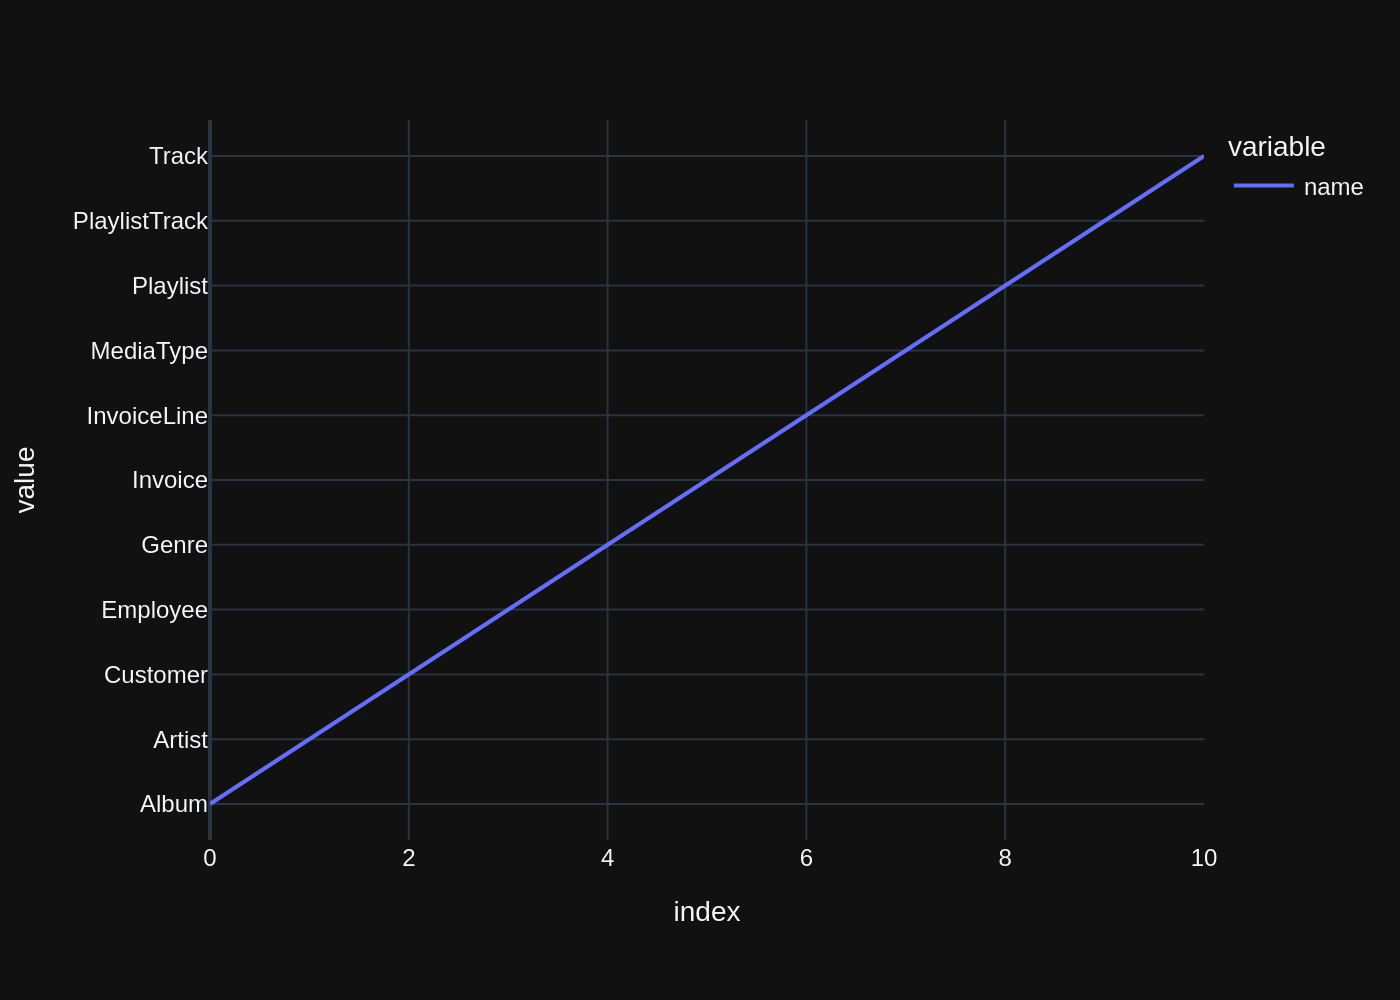

("SELECT name FROM sqlite_master WHERE type='table'",
              name
 0           Album
 1          Artist
 2        Customer
 3        Employee
 4           Genre
 5         Invoice
 6     InvoiceLine
 7       MediaType
 8        Playlist
 9   PlaylistTrack
 10          Track,
 Figure({
     'data': [{'hovertemplate': 'variable=name<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'name',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': 'name',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
               'xaxis': 'x',
               'y': array(['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice',
                           'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track'],
               

In [19]:
vn.ask(question="Show me a list of tables in the SQLite database")

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    Billi

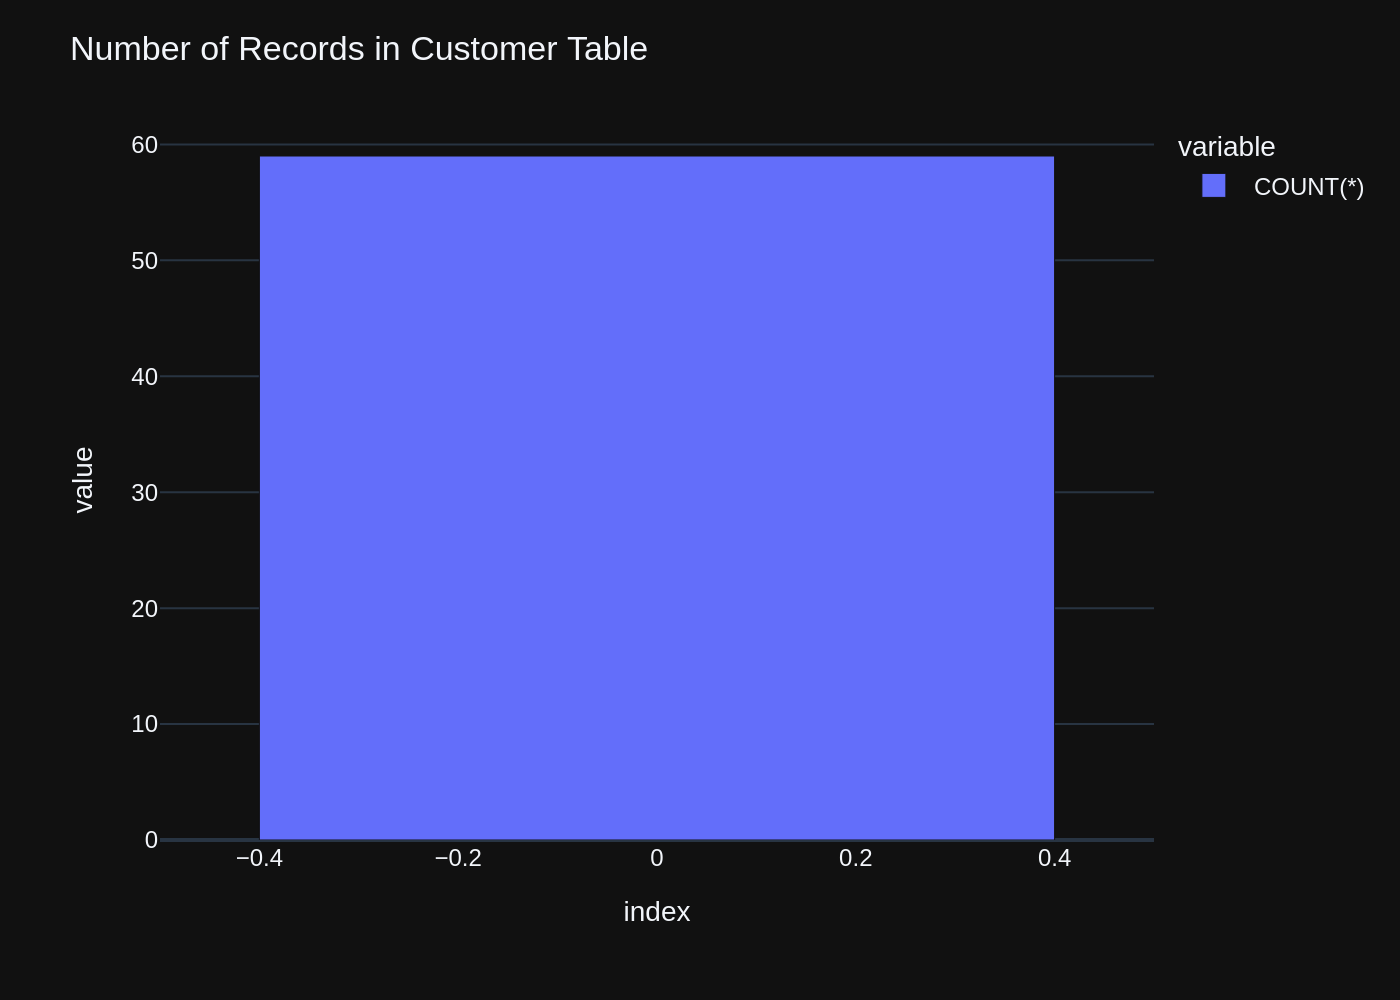

('SELECT COUNT(*) FROM Customer',
    COUNT(*)
 0        59,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'variable=COUNT(*)<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'COUNT(*)',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': 'COUNT(*)',
               'offsetgroup': 'COUNT(*)',
               'orientation': 'v',
               'showlegend': True,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([0]),
               'xaxis': 'x',
               'y': array([59]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'title': {'text': 'Number of Records in Customer Table'},
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': 

In [20]:
vn.ask(question="How many records are in table called customer")

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE Customer\n(\n    CustomerId INTEGER  NOT NULL,\n    FirstName NVARCHAR(40)  NOT NULL,\n    LastName NVARCHAR(20)  NOT NULL,\n    Company NVARCHAR(80),\n    Address NVARCHAR(70),\n    City NVARCHAR(40),\n    State NVARCHAR(40),\n    Country NVARCHAR(40),\n    PostalCode NVARCHAR(10),\n    Phone NVARCHAR(24),\n    Fax NVARCHAR(24),\n    Email NVARCHAR(60)  NOT NULL,\n    SupportRepId INTEGER,\n    CONSTRAINT PK_Customer PRIMARY KEY  (CustomerId),\n    FOREIGN KEY (SupportRepId) REFERENCES Employee (EmployeeId) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE Invoice\n(\n    InvoiceId INTEGER  NOT NULL,\n    CustomerId INTEGER  NOT NULL,\n    InvoiceDate DATETIME  NOT NULL,\n    BillingAddress NVARCHAR(70),\n    Billi

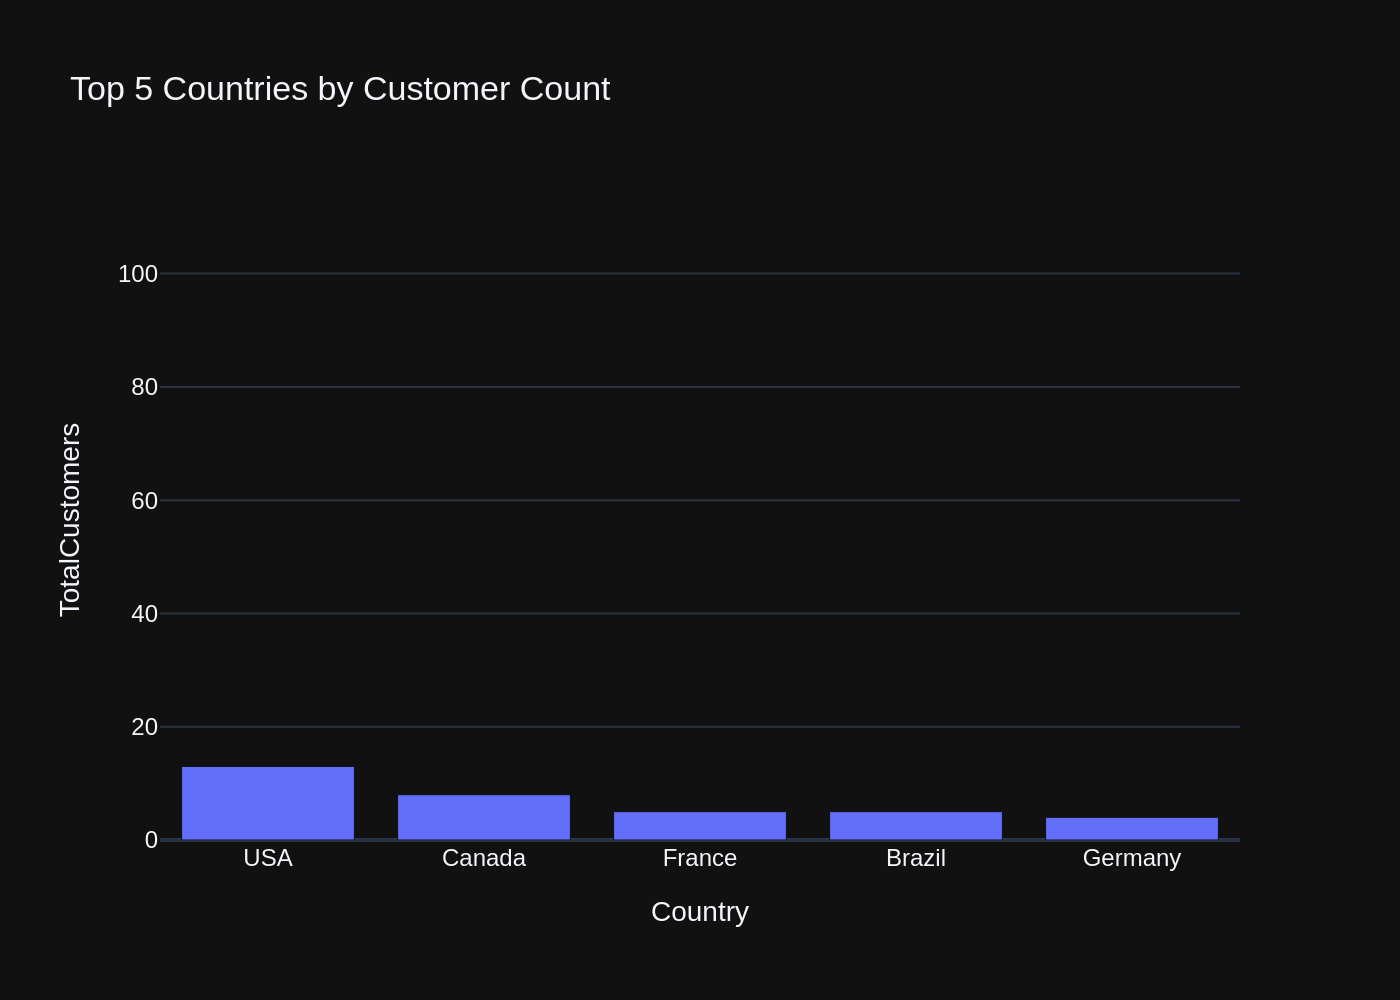

('SELECT Country, COUNT(*) AS TotalCustomers\nFROM Customer\nGROUP BY Country\nORDER BY TotalCustomers DESC\nLIMIT 5',
    Country  TotalCustomers
 0      USA              13
 1   Canada               8
 2   France               5
 3   Brazil               5
 4  Germany               4,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Country=%{x}<br>TotalCustomers=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['USA', 'Canada', 'France', 'Brazil', 'Germany'], dtype=object),
               'xaxis': 'x',
               'y': array([13,  8,  5,  5,  4]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'

In [21]:
vn.ask(question="what are the top 5 countries that customers come from?")

In [22]:
ts_stop = time()

elapsed_time = ts_stop - ts_start
print(f"elapsed_time : {elapsed_time} sec")

elapsed_time : 298.16392612457275 sec


## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the 
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
